In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor 

file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence']
target = 'salary_in_usd'

Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]

X = df[features]
y = df[target]

categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence']
numeric_features = ['work_year'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(  
        n_estimators=1000,
        max_depth=None,  
        learning_rate=0.01, 
        random_state=42,
        objective='reg:squarederror'
    ))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_train_pred = model_pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R2: {train_r2:.2f}")

y_test_pred = model_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R2: {test_r2:.2f}")



Train RMSE: 45347.11
Train R2: 0.42
Test RMSE: 45999.62
Test R2: 0.40


C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\elshe\AppData\Local\Packa

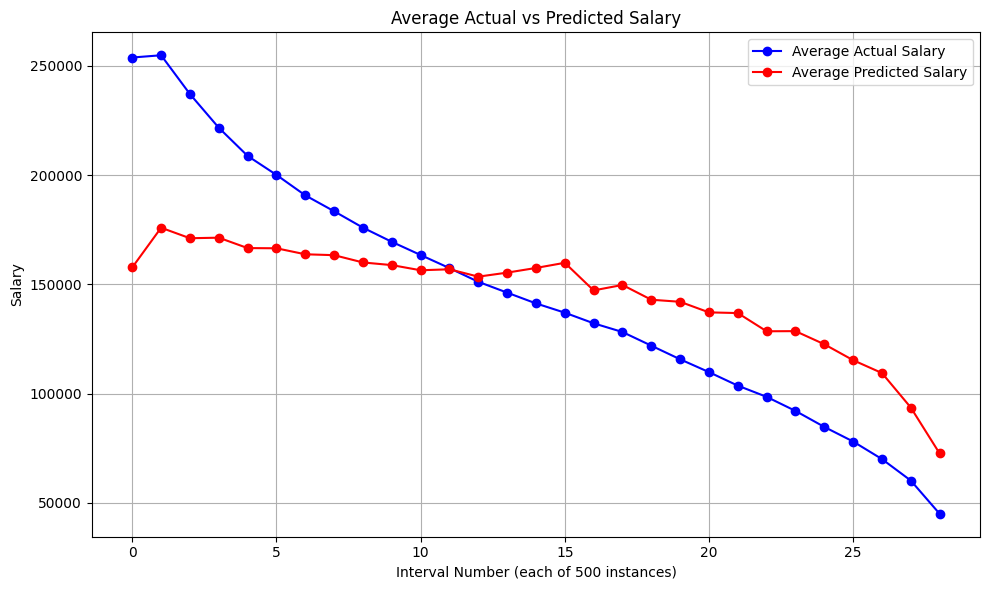

In [2]:
import matplotlib.pyplot as plt

num_intervals = len(X) // 500

y_true_avg = []
y_pred_avg = []

for i in range(num_intervals):
    start_idx = i * 500
    end_idx = (i + 1) * 500
    
    interval_X = X[start_idx:end_idx]

    y_pred_interval = model_pipeline.predict(interval_X)
    
    y_true_avg.append(np.mean(y[start_idx:end_idx]))
    y_pred_avg.append(np.mean(y_pred_interval))

plt.figure(figsize=(10, 6))
plt.plot(range(num_intervals), y_true_avg, marker='o', linestyle='-', color='b', label='Average Actual Salary')
plt.plot(range(num_intervals), y_pred_avg, marker='o', linestyle='-', color='r', label='Average Predicted Salary')
plt.title('Average Actual vs Predicted Salary')
plt.xlabel('Interval Number (each of 500 instances)')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


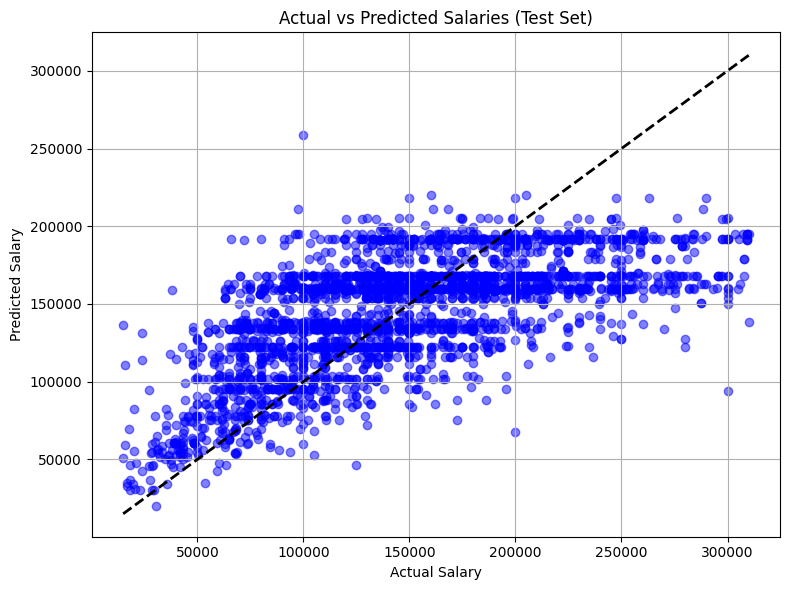

In [8]:
y_test_pred = model_pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Salaries (Test Set)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Load the data
file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

# Features and target
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence']
target = 'salary_in_usd'

# Remove outliers
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]

X = df[features]
y = df[target]

# Preprocessing
categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence']
numeric_features = ['work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200, 500, 1000],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R2: {train_r2:.2f}")

y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R2: {test_r2:.2f}")

print(f"Best hyperparameters: {grid_search.best_params_}")


Train RMSE: 44655.59
Train R2: 0.43
Test RMSE: 46084.66
Test R2: 0.41
Best hyperparameters: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}


C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
